<a href="https://colab.research.google.com/github/DerinOgrenme2021/SevketOzkaya/blob/main/%C3%96dev2(keras_cfhouse).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
import logging
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from IPython.display import HTML, display
from keras.layers import Dropout

In [80]:
train_dataset_raw = pd.read_csv('/content/sample_data/california_housing_train.csv')
test_dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [81]:
train_dataset = train_dataset_raw.copy(deep = True)
data_cleaner = [train_dataset, test_dataset]

In [82]:
train_dataset_raw.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [83]:
print (train_dataset)

       longitude  latitude  ...  median_income  median_house_value
0        -114.31     34.19  ...         1.4936             66900.0
1        -114.47     34.40  ...         1.8200             80100.0
2        -114.56     33.69  ...         1.6509             85700.0
3        -114.57     33.64  ...         3.1917             73400.0
4        -114.57     33.57  ...         1.9250             65500.0
...          ...       ...  ...            ...                 ...
16995    -124.26     40.58  ...         2.3571            111400.0
16996    -124.27     40.69  ...         2.5179             79000.0
16997    -124.30     41.84  ...         3.0313            103600.0
16998    -124.30     41.80  ...         1.9797             85800.0
16999    -124.35     40.54  ...         3.0147             94600.0

[17000 rows x 9 columns]


In [84]:
print(train_dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [85]:
print (test_dataset.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [86]:
print(train_dataset.corr())

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.925208  ...      -0.015485           -0.044982
latitude            -0.925208  1.000000  ...      -0.080303           -0.144917
housing_median_age  -0.114250  0.016454  ...      -0.115932            0.106758
total_rooms          0.047010 -0.038773  ...       0.195383            0.130991
total_bedrooms       0.071802 -0.069373  ...      -0.013495            0.045783
population           0.101674 -0.111261  ...      -0.000638           -0.027850
households           0.059628 -0.074902  ...       0.007644            0.061031
median_income       -0.015485 -0.080303  ...       1.000000            0.691871
median_house_value  -0.044982 -0.144917  ...       0.691871            1.000000

[9 rows x 9 columns]


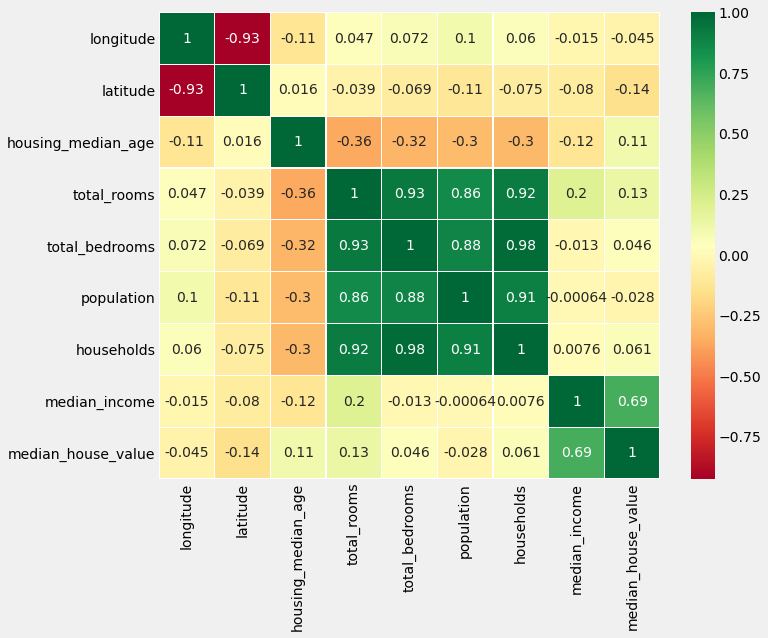

In [87]:
sns.heatmap(train_dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [88]:
features_col=['longitude','housing_median_age','total_rooms','median_income']
train_ds = train_dataset[features_col]
test_ds = test_dataset[features_col]
train_label = train_dataset['median_house_value']
print(train_ds.columns)
train_ds.head()

Index(['longitude', 'housing_median_age', 'total_rooms', 'median_income'], dtype='object')


,longitude,housing_median_age,total_rooms,median_income
0,-114.31,15.0,5612.0,1.4936
1,-114.47,19.0,7650.0,1.8200
2,-114.56,17.0,720.0,1.6509
3,-114.57,14.0,1501.0,3.1917
4,-114.57,20.0,1454.0,1.9250


In [89]:
training_scaler = StandardScaler()
training_predictors = training_scaler.fit_transform(train_ds)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(training_predictors, train_label, test_size=0.20)

In [100]:
model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [103]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
107/107 [==============================] - 1s 3ms/step - loss: 56064086016.0000 - val_loss: 57868652544.0000
Epoch 2/400
107/107 [==============================] - 0s 2ms/step - loss: 56063811584.0000 - val_loss: 57868251136.0000
Epoch 3/400
107/107 [==============================] - 0s 2ms/step - loss: 56063283200.0000 - val_loss: 57867513856.0000
Epoch 4/400
107/107 [==============================] - 0s 2ms/step - loss: 56062373888.0000 - val_loss: 57866350592.0000
Epoch 5/400
107/107 [==============================] - 0s 2ms/step - loss: 56060923904.0000 - val_loss: 57864589312.0000
Epoch 6/400
107/107 [==============================] - 0s 2ms/step - loss: 56058929152.0000 - val_loss: 57862070272.0000
Epoch 7/400
107/107 [==============================] - 0s 2ms/step - loss: 56055947264.0000 - val_loss: 57858551808.0000
Epoch 8/400
107/107 [==============================] - 0s 2ms/step - loss: 56052404224.0000 - val_loss: 57853898752.0000
Epoch 9/400
107/107 [===========

In [104]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 8)                 40        
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 8)                 0         
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 27        
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 3)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 4         
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


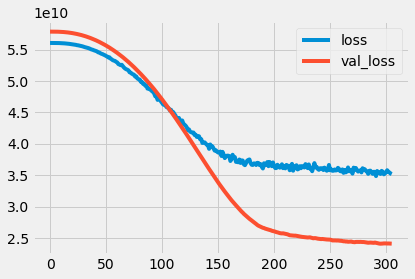

In [105]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [107]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(X_test)

In [108]:
mean_absolute_error(y_test,predictions)

124330.36589096967

In [109]:
np.sqrt(mean_squared_error(y_test,predictions))

155185.67785110904